<a href="https://colab.research.google.com/github/negiamishhu/Stock-Price-Analysis-Tool/blob/main/Finance_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Analysis Tool

##Importing of libraries


In [ ]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Data
#We need to get data using pandas datareader. We will get stock information for the following banks:

#Bank of America
#CitiGroup
#Goldman Sachs
#JPMorgan Chase
#Morgan Stanley
#Wells Fargo

In [ ]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [ ]:
api_key="ZNNSX1RYVYPRBI8N"

In [ ]:
# Bank of America
BAC = data.DataReader("BAC", 'av-daily', start, end,api_key=api_key)

# CitiGroup
C = data.DataReader("C", 'av-daily', start, end,api_key=api_key)

# Goldman Sachs
GS = data.DataReader("GS", 'av-daily', start, end,api_key=api_key)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'av-daily', start, end,api_key=api_key)

# Morgan Stanley
MS = data.DataReader("MS", 'av-daily', start, end,api_key=api_key)

# Wells Fargo
WFC = data.DataReader("WFC", 'av-daily', start, end,api_key=api_key)

In [ ]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'av-daily', start, end,api_key=api_key)

In [ ]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']


In [ ]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [ ]:

bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [ ]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
2006-01-03   46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04   47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05   46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06   46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09   46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

Bank Ticker            ...     MS                                    WFC  \
Stock Info     volume  ...   open   high      low  close   volume   open   
2006-01-03   15376000  ...  57.17  58.49  56.7400  58.31  5377000  63.20   
2006-01-04   18709000  ...  58.70  59.28  58.3500  58.35  7977800  63.60   
2006-01-05   11431000  ...  58.55  58.59  58.0200  58.51  5778000  63.00   
2006-01-06   13702000  ...  58.77  58.85  58.0500  58.57  6889800  63.16   
2006-01-09   16807000  ...  58.63  59.29  58.6244  59.19  4144500  63.35   

Bank Ticker                                
Stock Info    high    low  close   volume  
2006-01-03   63.95  62.39  63.80  5508200  
2006-01-04   63.64  62.73  63.06  5435000  
2006-01-05   63.11  62.62  62.99  5079000  
2006-01-06   63.55  62.77  63.36  4201900  
2006-01-09   63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

In [ ]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

In [ ]:
returns = pd.DataFrame()

In [ ]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['close'].pct_change()
returns.head(30)

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789
2006-01-11,-0.002380,0.009065,-0.000454,-0.000737,0.005910,0.005213
2006-01-12,-0.006508,0.001021,0.002122,-0.018428,-0.001679,-0.011630
2006-01-13,0.000000,-0.002244,0.007637,-0.000751,-0.001513,0.005724
2006-01-17,-0.010699,-0.010016,-0.005028,-0.005261,-0.009599,-0.010277


In [ ]:
returns[1:]

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156
2015-12-30,-0.013310,-0.012835,-0.008282,-0.007157,-0.009831,-0.007235


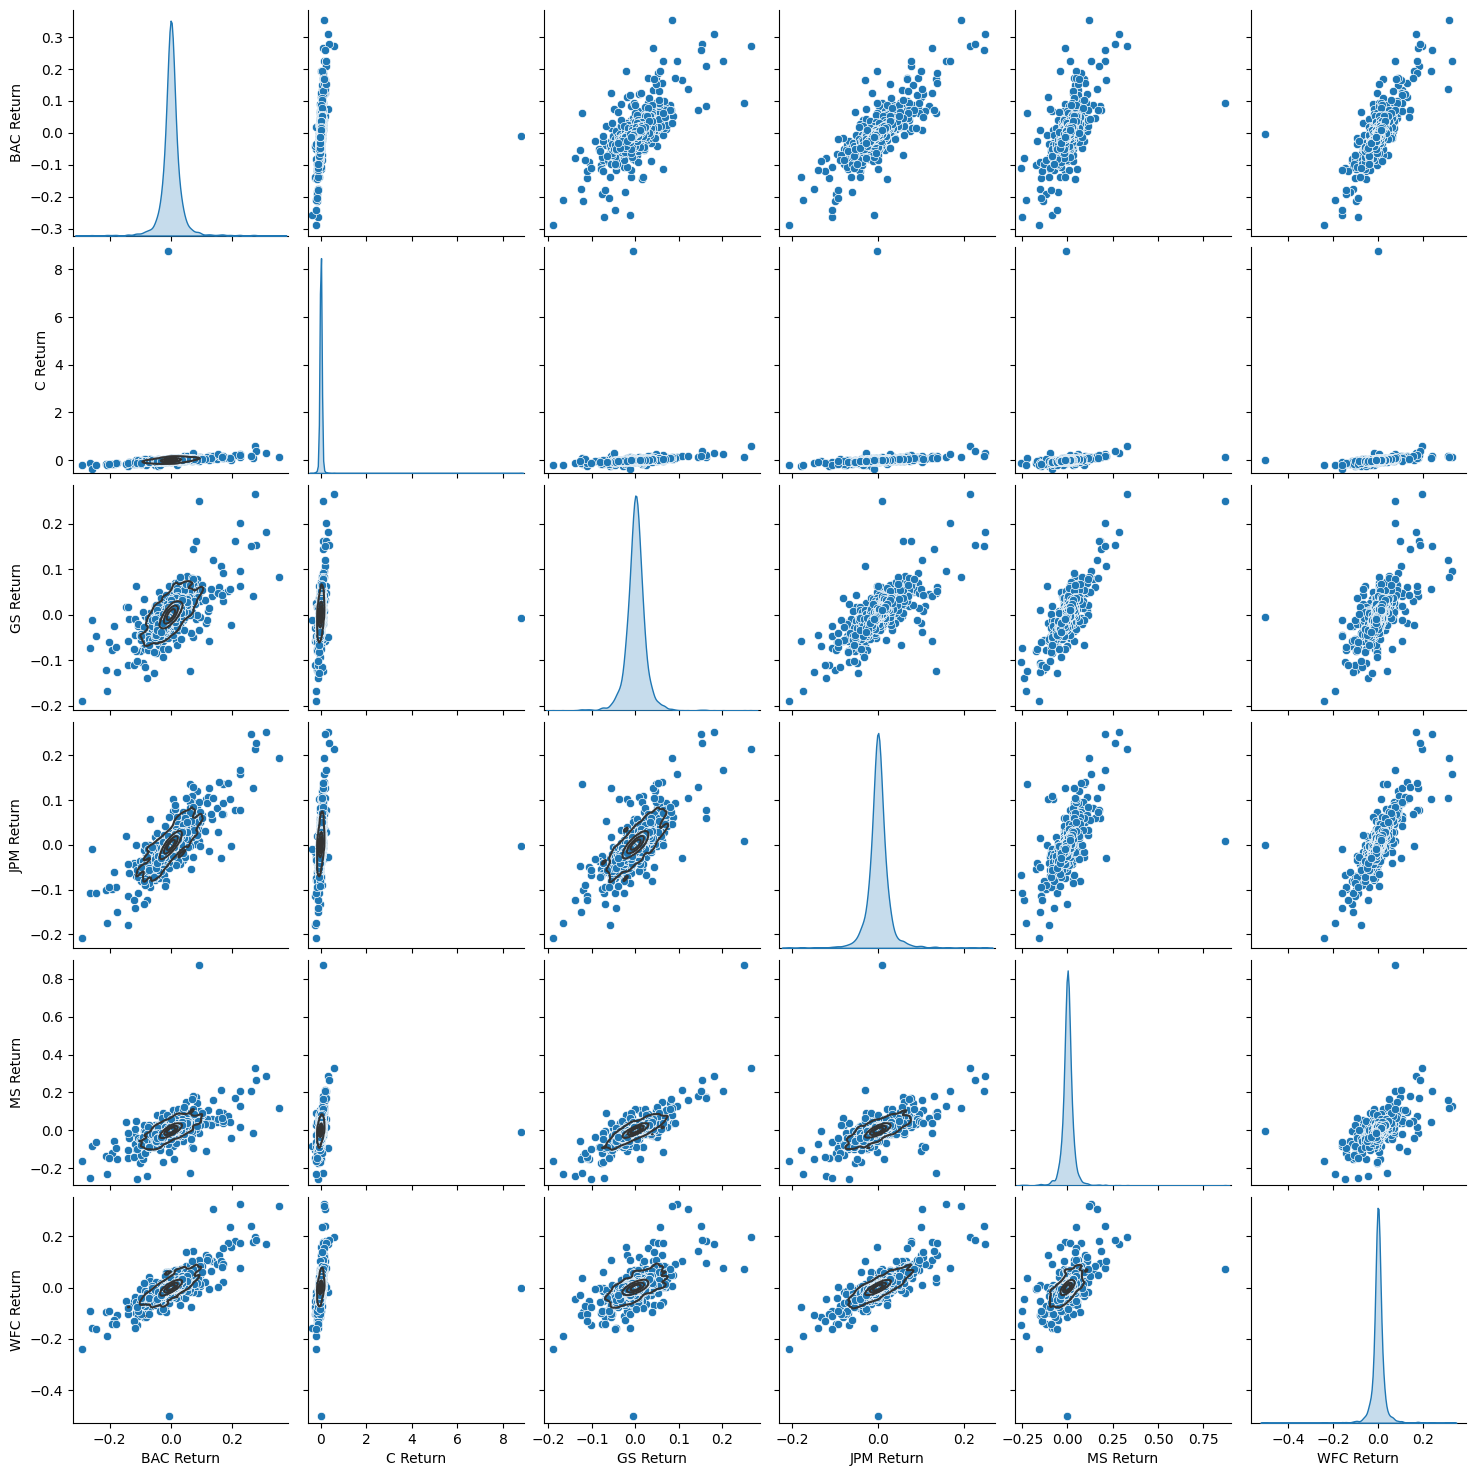

In [ ]:
#returns[1:]
import seaborn as sns
g=sns.pairplot(returns[1:],diag_kind="kde")
g.map_lower(sns.kdeplot, levels=5, color=".2")

In [ ]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return    2009-01-20
C Return      2009-02-27
GS Return     2009-01-20
JPM Return    2009-01-20
MS Return     2008-10-09
WFC Return    2006-08-14
dtype: object

In [ ]:
returns.idxmax()

BAC Return    2009-04-09
C Return      2011-05-09
GS Return     2008-11-24
JPM Return    2009-01-21
MS Return     2008-10-13
WFC Return    2008-07-16
dtype: object

In [ ]:
returns.std() # Citigroup riskiest

BAC Return    0.036628
C Return      0.179066
GS Return     0.025358
JPM Return    0.027651
MS Return     0.037821
WFC Return    0.031838
dtype: float64

In [ ]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [ ]:
print(returns.columns)

Index(['BAC Return', 'C Return', 'GS Return', 'JPM Return', 'MS Return',
       'WFC Return'],
      dtype='object')


<ipython-input-77-1ae83434bcc7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['JPM Return'],color='green',bins=100)


<Axes: xlabel='JPM Return', ylabel='Density'>

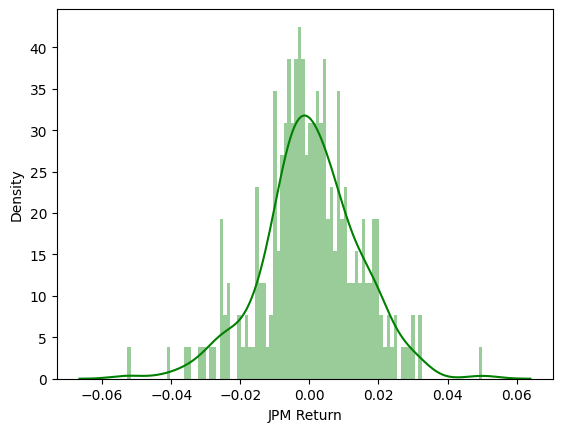

In [ ]:

import seaborn as sns
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['JPM Return'],color='green',bins=100)

<ipython-input-78-578cec4b5c47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)


<Axes: xlabel='C Return', ylabel='Density'>

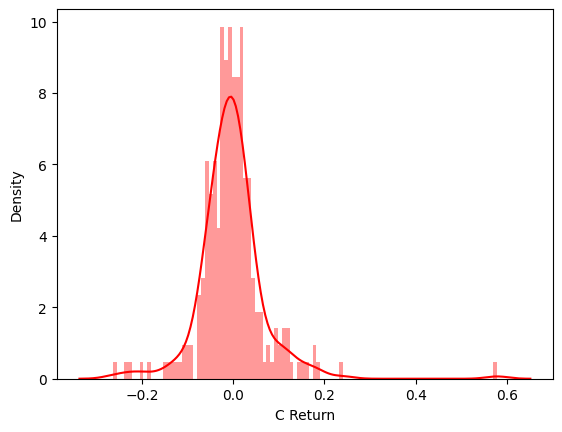

In [ ]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

In [ ]:
returns[1:].head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789


In [ ]:
n=returns.index
n10=random.choices(n, k=5)

Text(0.5, 1.0, 'step')

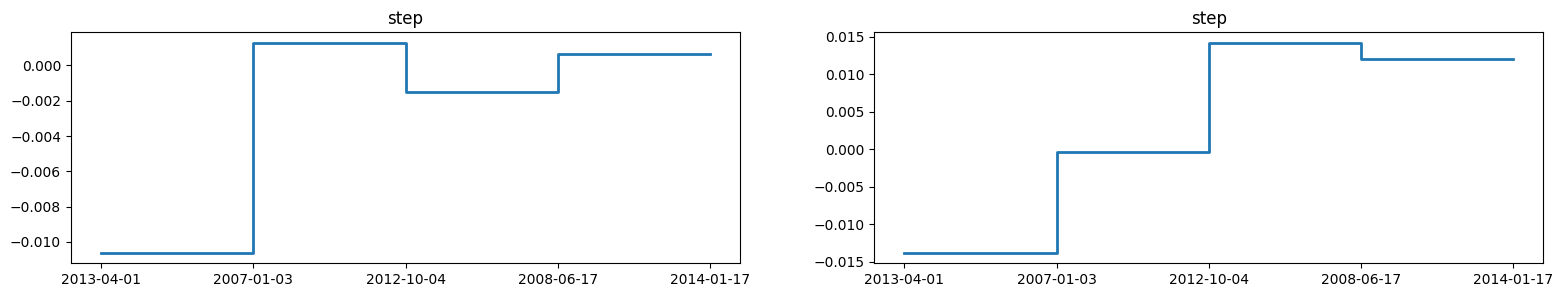

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(19,3))

axes[0].step(n10,returns["BAC Return"].head(5),lw=2)
axes[0].set_title("step")

axes[1].step(n10,returns["GS Return"].head(5),lw=2)
axes[1].set_title("step")


### **More Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

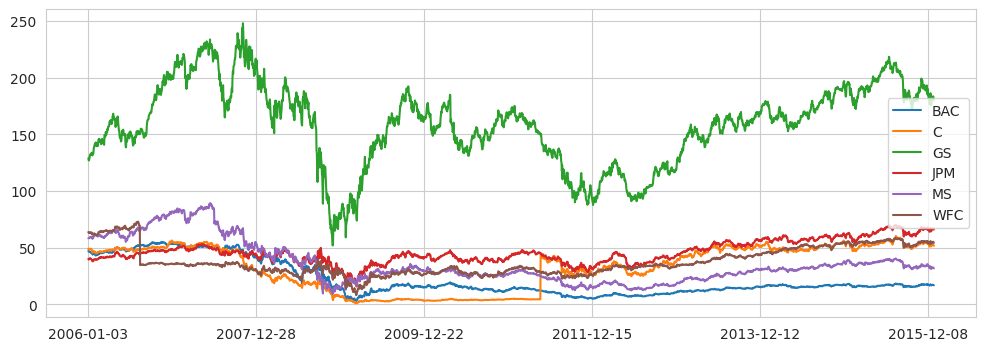

In [ ]:
for tick in tickers:
    bank_stocks[tick]['close'].plot(figsize=(12,4),label=tick)
plt.legend()


In [ ]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').iplot()

NameError: ignored

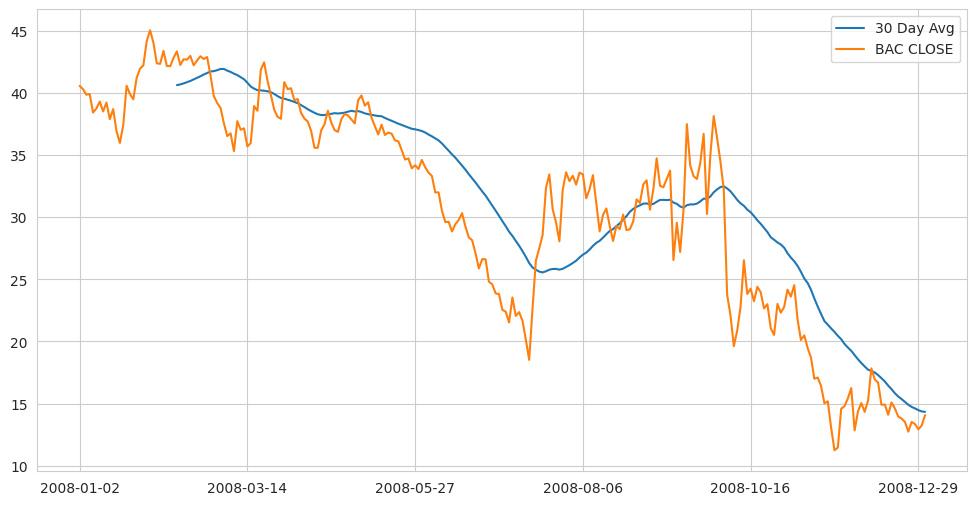

In [ ]:
plt.figure(figsize=(12,6))
BAC['close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

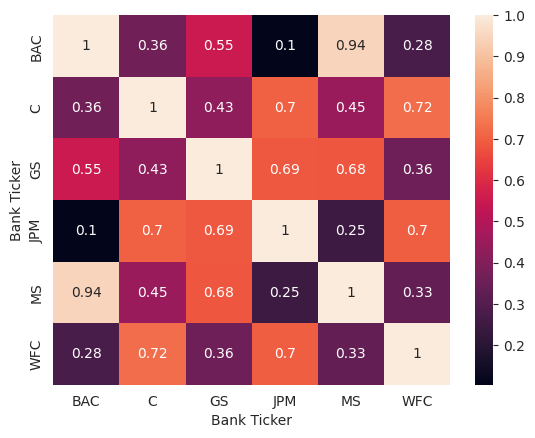

In [ ]:
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

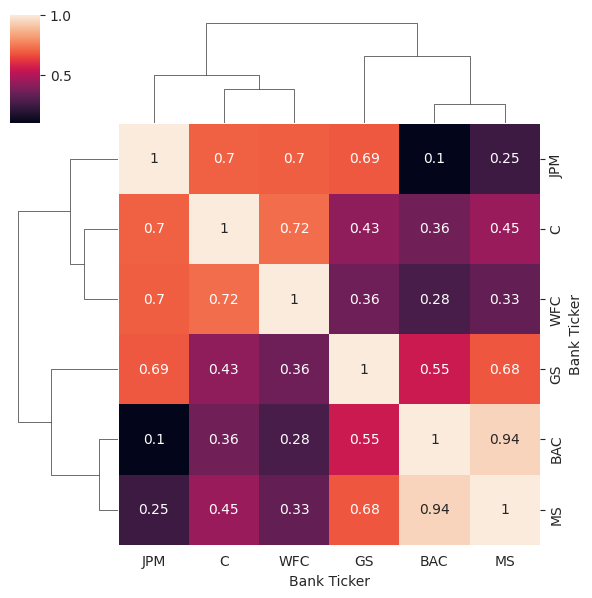

In [ ]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True,figsize=(6,6))

In [ ]:
close_corr = bank_stocks.xs(key='close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')


In [ ]:
BAC.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
BAC['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

In [ ]:
BAC[['open', 'high', 'low', 'close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [ ]:
MS['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')